## Data Cleaning and Preparation

In [3]:
# Import required libraries
import pandas as pd
import numpy as np

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [6]:
validation_data_path = 'validation_dataset.csv'
validation_data = pd.read_csv(validation_data_path)
validation_data.head()

,index,age,sex,bmi,children,smoker,region
0,0,18,female,24.090000,1,no,southeast
1,1,39,male,26.410000,0,yes,northeast
2,2,27,male,29.150000,0,yes,southeast
3,3,71,male,65.502135,13,yes,southeast
4,4,28,male,38.060000,0,no,southeast


In [14]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [16]:
insurance.shape

(1338, 7)

In [18]:
insurance.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [20]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1272.000000,1272,1272.000000,1272.000000,1272,1272,1284
unique,NaN,6,NaN,NaN,2,8,1272
top,NaN,male,NaN,NaN,no,Southeast,$nan
freq,NaN,517,NaN,NaN,1013,172,12
mean,35.214623,NaN,30.560550,0.948899,NaN,NaN,NaN
std,22.478251,NaN,6.095573,1.303532,NaN,NaN,NaN
min,-64.000000,NaN,15.960000,-4.000000,NaN,NaN,NaN
25%,24.750000,NaN,26.180000,0.000000,NaN,NaN,NaN
50%,38.000000,NaN,30.210000,1.000000,NaN,NaN,NaN
75%,51.000000,NaN,34.485000,2.000000,NaN,NaN,NaN


In [34]:
insurance_na = insurance[insurance.isna().any(axis=1)]

In [36]:
insurance_na.head()

,age,sex,bmi,children,smoker,region,charges
23,-34.0,female,NaN,1.0,yes,NaN,$37701.8768
32,NaN,NaN,28.6,NaN,NaN,Southwest,$nan
43,37.0,female,NaN,NaN,NaN,southeast,6313.759
44,NaN,male,NaN,NaN,no,NaN,NaN
49,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [38]:
insurance[insurance.isna().all(axis=1)]

,age,sex,bmi,children,smoker,region,charges
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
insurance.duplicated().sum()

1

In [49]:
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
insurance.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges      object
dtype: object

In [54]:
insurance['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', nan, 'M'], dtype=object)

In [56]:
# Standardize sex column values
sex_dict = {
    'M': 'male', 
    'man': 'male', 
    'F': 'female', 
    'woman': 'female'
}

insurance['sex'] = insurance['sex'].replace(sex_dict)
insurance['sex'].unique()

array(['female', 'male', nan], dtype=object)

In [65]:
insurance[['charges']].head()

,charges
0,16884.924
1,1725.5523
2,$4449.462
3,$21984.47061
4,$3866.8552


In [67]:
insurance[['charges']].tail()

,charges
1333,$10600.5483
1334,2205.9808
1335,$1629.8335
1336,2007.945
1337,29141.3603


In [73]:
insurance[insurance['charges'].astype(str).str.contains(r'\$')].head()

,age,sex,bmi,children,smoker,region,charges
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
5,-31.0,female,25.740,0.0,no,southeast,$3756.6216
8,37.0,male,29.830,2.0,no,Northeast,$6406.4107


In [75]:
insurance[~insurance['charges'].astype(str).str.contains(r'\$', na=False)].head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.924
1,18.0,male,33.77,1.0,no,Southeast,1725.5523
6,46.0,female,33.44,1.0,no,southeast,8240.5896
7,37.0,female,27.74,3.0,no,Northwest,7281.5056
9,60.0,female,25.84,0.0,no,northwest,28923.13692


In [77]:
# Remove dollar signs from charges and convert to float
insurance['charges'] = insurance['charges'].str.replace('$', '', regex=False).astype(float)

In [83]:
# Check if the 'age' column has negative values
insurance[insurance['age'] < 0].head()

,age,sex,bmi,children,smoker,region,charges
5,-31.0,female,25.740,0.0,no,southeast,3756.62160
14,-27.0,male,42.130,0.0,yes,southeast,39611.75770
17,-23.0,male,23.845,0.0,no,northeast,2395.17155
23,-34.0,female,NaN,1.0,yes,NaN,37701.87680
79,-41.0,female,32.965,-0.0,no,Northwest,6571.02435


In [87]:
insurance[insurance['age'] < 0].tail()

,age,sex,bmi,children,smoker,region,charges
1278,-39.0,male,29.925,1.0,yes,northeast,22462.04375
1291,-19.0,male,34.900,0.0,yes,southwest,34828.65400
1303,-43.0,male,27.800,0.0,yes,southwest,37829.72420
1311,-33.0,female,26.695,0.0,no,northwest,4571.41305
1334,-18.0,female,31.920,0.0,no,Northeast,2205.98080


In [90]:
# Remove rows with negative ages
insurance = insurance[insurance["age"] > 0].copy()

In [92]:
insurance[insurance['age'] < 0].head()

,age,sex,bmi,children,smoker,region,charges


In [95]:
insurance[insurance['children'] < 0].head()

,age,sex,bmi,children,smoker,region,charges
34,28.0,male,36.400,-1.0,yes,Southwest,51194.55914
66,61.0,female,39.100,-2.0,no,southwest,14235.07200
84,37.0,female,34.800,-2.0,yes,Southwest,39836.51900
105,20.0,male,28.025,-1.0,yes,Northwest,17560.37975
129,38.0,male,34.700,-2.0,no,southwest,6082.40500


In [97]:
# Convert negative children values to zero
insurance.loc[insurance["children"] < 0, "children"] = 0

In [99]:
insurance[insurance['children'] < 0].head()

,age,sex,bmi,children,smoker,region,charges


In [103]:
# Convert region values to lowercase
insurance["region"] = insurance["region"].str.lower()

In [107]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast', nan],
      dtype=object)

In [110]:
# Drop any remaining missing values
insurance = insurance.dropna()

In [112]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [115]:
print(f"Dataset cleaned. Shape: {insurance.shape}")

Dataset cleaned. Shape: (1149, 7)


In [119]:
insurance.to_csv('insurance_cleaned.csv', index=False)

In [123]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [128]:
insurance.duplicated().sum()

1

In [131]:
insurance[insurance.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19.0,male,30.59,0.0,no,northwest,1639.5631
581,19.0,male,30.59,0.0,no,northwest,1639.5631


In [133]:
insurance = insurance.drop_duplicates()

In [135]:
insurance.duplicated().sum()

0

In [137]:
insurance.to_csv('insurance_cleaned.csv', index=False)

In [143]:
insurance.shape

(1148, 7)

In [151]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


Text(0.5, 1.0, 'Average Charges by Region')

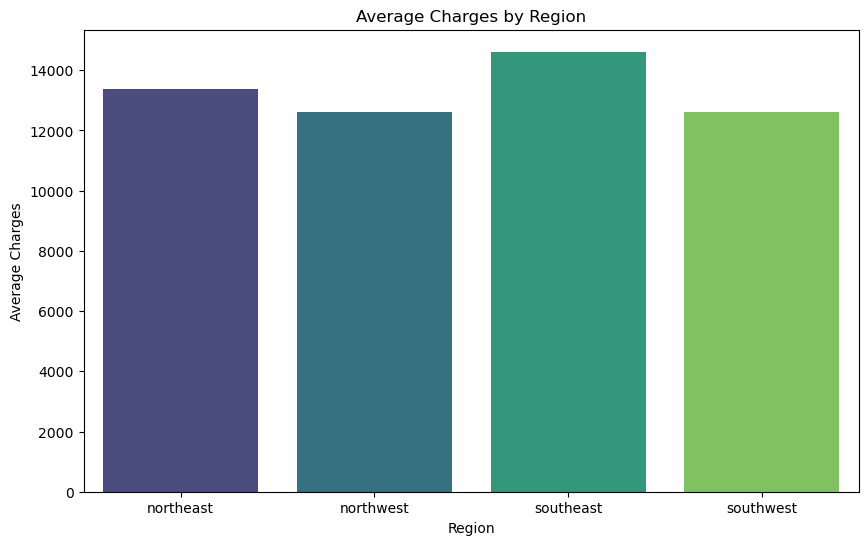

In [155]:
charges_by_region = insurance.groupby('region')['charges'].mean().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=charges_by_region, x='region', y='charges',hue='region', palette='viridis')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Charges by Region')

Text(0.5, 1.0, 'Average Charges by Age')

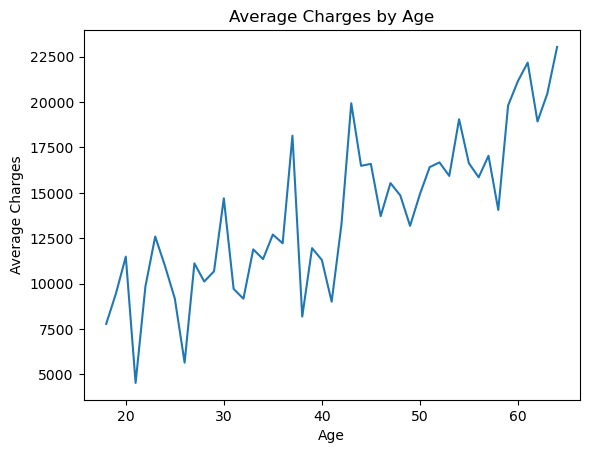

In [157]:
charges_by_age = insurance.groupby('age')['charges'].mean().reset_index()
sns.lineplot(data=charges_by_age, x='age', y='charges')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')

<Axes: xlabel='bmi', ylabel='charges'>

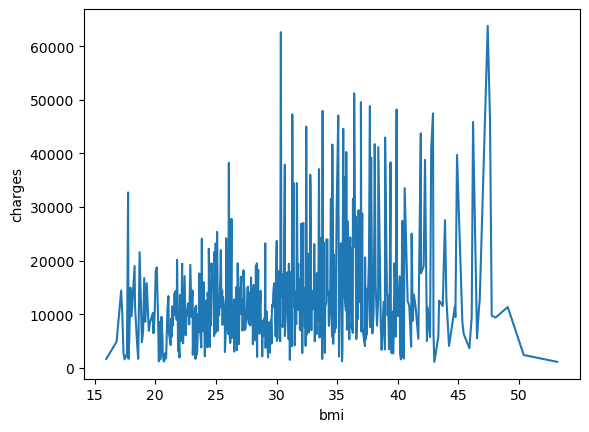

In [159]:
charges_by_bmi = insurance.groupby('bmi')['charges'].mean().reset_index()
sns.lineplot(data=charges_by_bmi, x='bmi', y='charges')

<Axes: xlabel='age', ylabel='charges'>

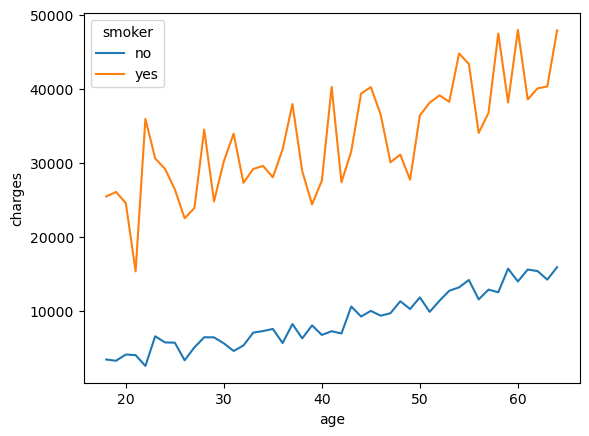

In [161]:
charges_by_age_smoker = insurance.groupby(['age', 'smoker'])['charges'].mean().reset_index()
sns.lineplot(data=charges_by_age_smoker, x='age', y='charges', hue='smoker')